# An Empirical Comparison of Supervised and Self-Supervised Learning

In [94]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

In [95]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Baseline: convolutional neural network

In [96]:
conv_args = TrainArgs(batchsize = 10)

In [97]:
ConvNet, conv_losses = train_ConvNet(conv_args)

Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 0, i:   999] avg mini-batch loss: 2.288
[epoch: 0, i:  1499] avg mini-batch loss: 2.246
[epoch: 0, i:  1999] avg mini-batch loss: 2.179
[epoch: 0, i:  2499] avg mini-batch loss: 2.101
[epoch: 0, i:  2999] avg mini-batch loss: 2.067
[epoch: 1, i:   499] avg mini-batch loss: 1.993
[epoch: 1, i:   999] avg mini-batch loss: 1.948
[epoch: 1, i:  1499] avg mini-batch loss: 1.907
[epoch: 1, i:  1999] avg mini-batch loss: 1.887
[epoch: 1, i:  2499] avg mini-batch loss: 1.867
[epoch: 1, i:  2999] avg mini-batch loss: 1.845
[epoch: 2, i:   499] avg mini-batch loss: 1.795
[epoch: 2, i:   999] avg mini-batch loss: 1.790
[epoch: 2, i:  1499] avg mini-batch loss: 1.777
[epoch: 2, i:  1999] avg mini-batch loss: 1.744
[epoch: 2, i:  2499] avg mini-batch loss: 1.756
[epoch: 2, i:  2999] avg mini-batch loss: 1.712
[epoch: 3, i:   499] avg mini-batch loss: 1.

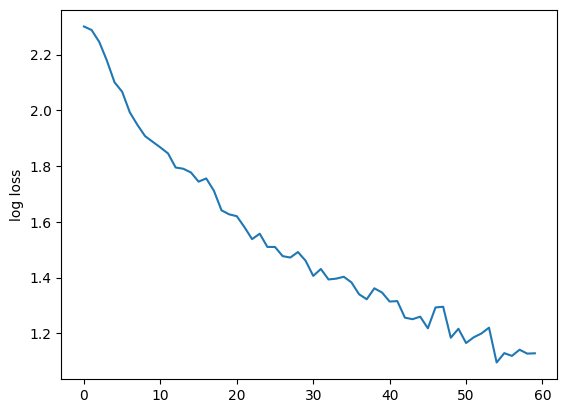

In [98]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [99]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Files already downloaded and verified
Baseline accuracy of the convolutional model is 52.99666666666667 %


## Momentum Contrast

### Pre-Training the Encoder

In [100]:
encoder_args = TrainArgs(epochs = 20)

In [101]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.042723
Train Epoch: 2 	Loss: 0.020762
Train Epoch: 3 	Loss: 0.011686
Train Epoch: 4 	Loss: 0.007639
Train Epoch: 5 	Loss: 0.005852
Train Epoch: 6 	Loss: 0.004688
Train Epoch: 7 	Loss: 0.004051
Train Epoch: 8 	Loss: 0.003683
Train Epoch: 9 	Loss: 0.003292
Train Epoch: 10 	Loss: 0.003157
Train Epoch: 11 	Loss: 0.002961
Train Epoch: 12 	Loss: 0.002757
Train Epoch: 13 	Loss: 0.002646
Train Epoch: 14 	Loss: 0.002583
Train Epoch: 15 	Loss: 0.002505
Train Epoch: 16 	Loss: 0.002385
Train Epoch: 17 	Loss: 0.002368
Train Epoch: 18 	Loss: 0.002270
Train Epoch: 19 	Loss: 0.002207
Train Epoch: 20 	Loss: 0.002151


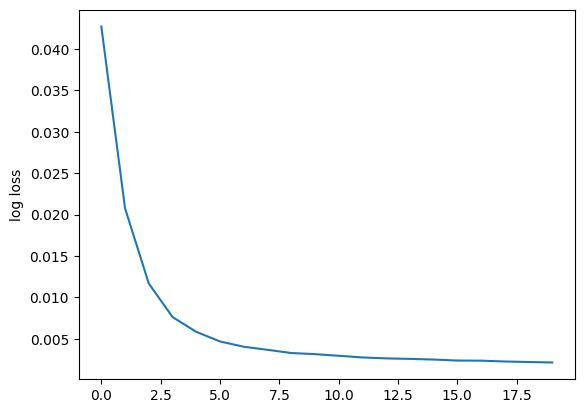

In [102]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [103]:
data, targets = encode_data()

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 30000/30000 [05:47<00:00, 86.28it/s]


In [104]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified
Files already downloaded and verified


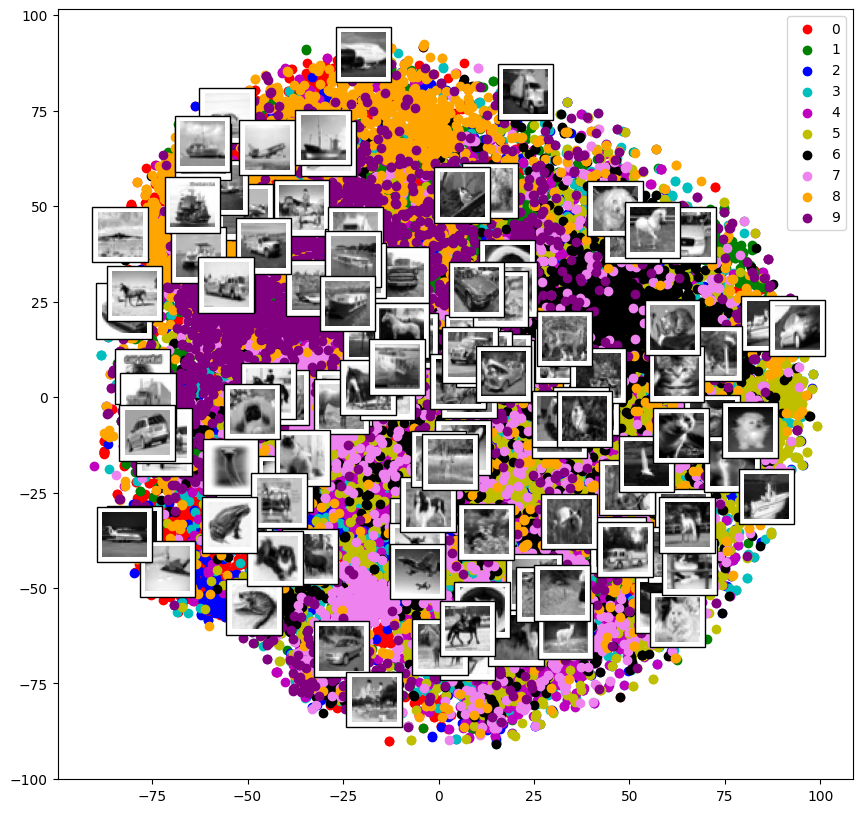

In [105]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [106]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 30000/30000 [05:45<00:00, 86.92it/s]


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 30000/30000 [05:47<00:00, 86.44it/s]


In [107]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [108]:
svm.score(X_test, y_test)

0.6206

### Multiple Runs

In [109]:
# subsample so things run faster
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 30000/30000 [05:55<00:00, 84.43it/s]


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 30000/30000 [05:58<00:00, 83.72it/s]


In [110]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [111]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=False)
    conv_errors.append(test_conv(ConvNet, subsample=False)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 0, i:   999] avg mini-batch loss: 2.299
[epoch: 0, i:  1499] avg mini-batch loss: 2.292
[epoch: 0, i:  1999] avg mini-batch loss: 2.270
[epoch: 0, i:  2499] avg mini-batch loss: 2.202
[epoch: 0, i:  2999] avg mini-batch loss: 2.119
[epoch: 1, i:   499] avg mini-batch loss: 2.009
[epoch: 1, i:   999] avg mini-batch loss: 1.917
[epoch: 1, i:  1499] avg mini-batch loss: 1.858
[epoch: 1, i:  1999] avg mini-batch loss: 1.771
[epoch: 1, i:  2499] avg mini-batch loss: 1.730
[epoch: 1, i:  2999] avg mini-batch loss: 1.676
[epoch: 2, i:   499] avg mini-batch loss: 1.602
[epoch: 2, i:   999] avg mini-batch loss: 1.596
[epoch: 2, i:  1499] avg mini-batch loss: 1.602
[epoch: 2, i:  1999] avg mini-batch loss: 1.574
[epoch: 2, i:  2499] avg mini-batch loss: 1.520
[epoch: 2, i:  2999] avg mini-batch loss: 1.520
[epoch: 3, i:   499] avg mini-batch loss: 1.

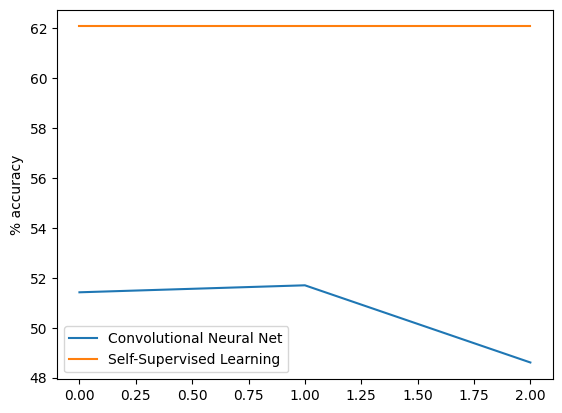

In [112]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [113]:
conv_errors

[51.416666666666664, 51.696666666666665, 48.60666666666666]

In [114]:
svm_errors

[0.6206, 0.6206, 0.6206]

In [115]:
conv_errors

[51.416666666666664, 51.696666666666665, 48.60666666666666]